# **Assignment 5: Bayesian Analysis**



In [1]:
import numpy as np
import matplotlib.pyplot as plt

#**Define the beta distribution**

In [69]:
def beta_distribution(x, a, b):
    return (x**(a-1) * (1-x)**(b-1)) / (np.math.gamma(a) * np.math.gamma(b) / np.math.gamma(a+b))

priors = [(2, 5), (5, 2), (1, 1), (2,2)]
outcomes = ['H', 'H', 'H', 'T', 'T', 'T', 'H', 'H', 'H', 'T']

In [70]:
num_priors = len(priors)
num_rows = int(np.ceil(num_priors**0.5))
num_cols = int(np.ceil(num_priors / num_rows))

# Prior Distributions

<ipython-input-69-5c7ea16773cf>:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (x**(a-1) * (1-x)**(b-1)) / (np.math.gamma(a) * np.math.gamma(b) / np.math.gamma(a+b))


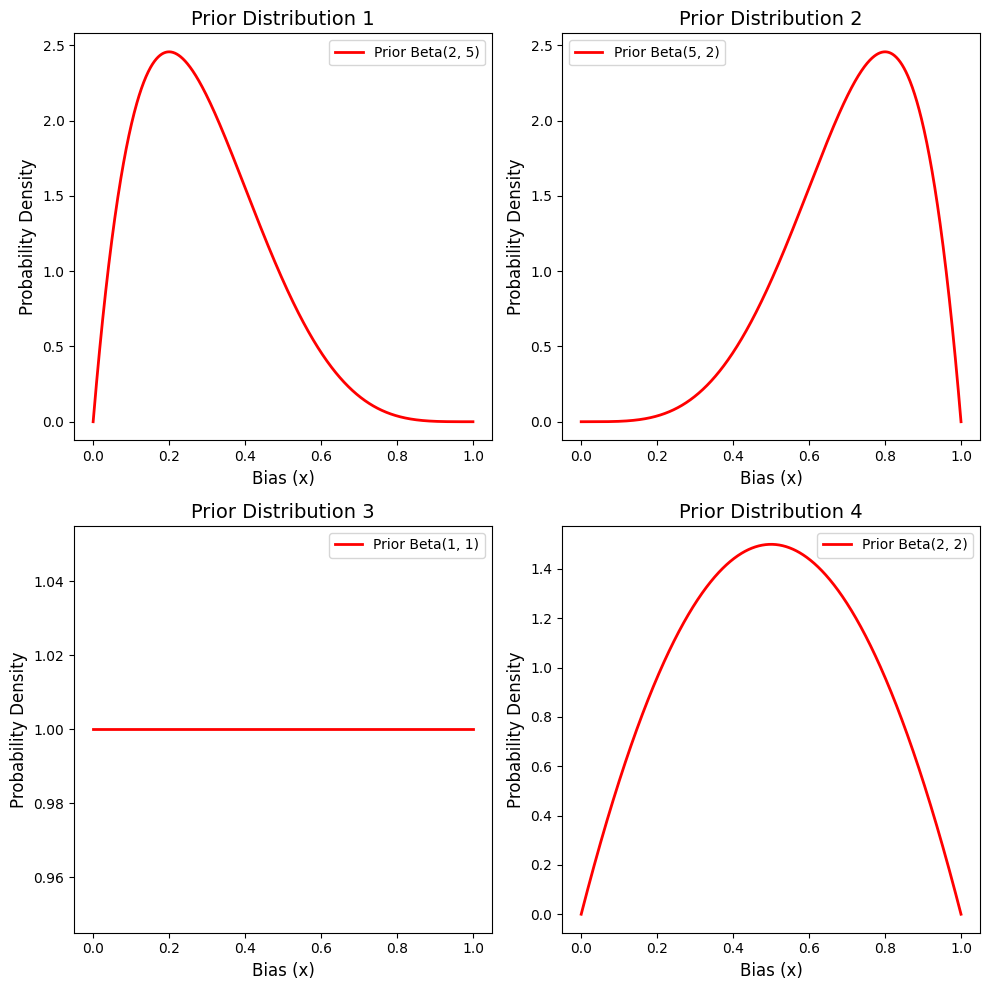

In [71]:
x = np.linspace(0, 1, 1000)

# Create a figure and a grid of subplots with predefined parameters
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Flatten the axs array if it's more than 1 row
if num_rows > 1:
    axs = axs.flatten()

# Plot prior distributions on each subplot
for i, (a, b) in enumerate(priors):
    if num_priors == 1:
        ax = axs
    else:
        ax = axs[i]
    ax.plot(x, beta_distribution(x, a, b), 'r-', lw=2, label='Prior Beta({}, {})'.format(a, b))
    ax.set_title('Prior Distribution {}'.format(i+1), fontsize=14)
    ax.set_xlabel('Bias (x)', fontsize=12)
    ax.set_ylabel('Probability Density', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.legend(prop={'size': 10})
for i in range(num_priors, num_rows * num_cols):
    axs.flatten()[i].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#Likelihood distribution

<ipython-input-69-5c7ea16773cf>:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (x**(a-1) * (1-x)**(b-1)) / (np.math.gamma(a) * np.math.gamma(b) / np.math.gamma(a+b))


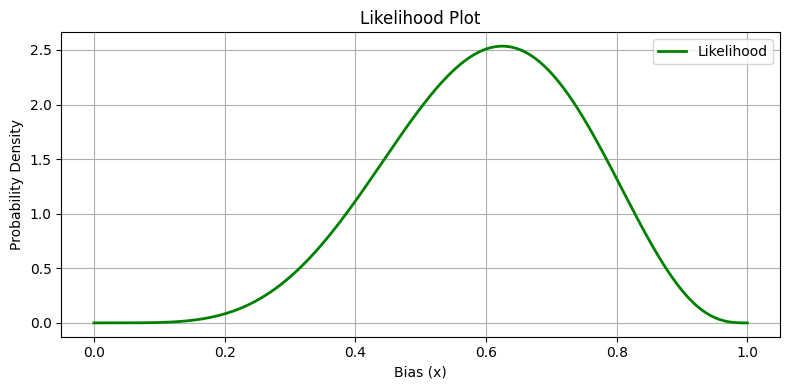

In [72]:
likelihood_a = sum(1 for outcome in outcomes if outcome == 'H')
likelihood_b = len(outcomes) - likelihood_a

plt.figure(figsize=(8, 4))
plt.plot(x, beta_distribution(x, likelihood_a, likelihood_b), 'g-', lw=2, label='Likelihood')
plt.title('Likelihood Plot')
plt.xlabel('Bias (x)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Posterior Distribtion

<ipython-input-69-5c7ea16773cf>:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (x**(a-1) * (1-x)**(b-1)) / (np.math.gamma(a) * np.math.gamma(b) / np.math.gamma(a+b))


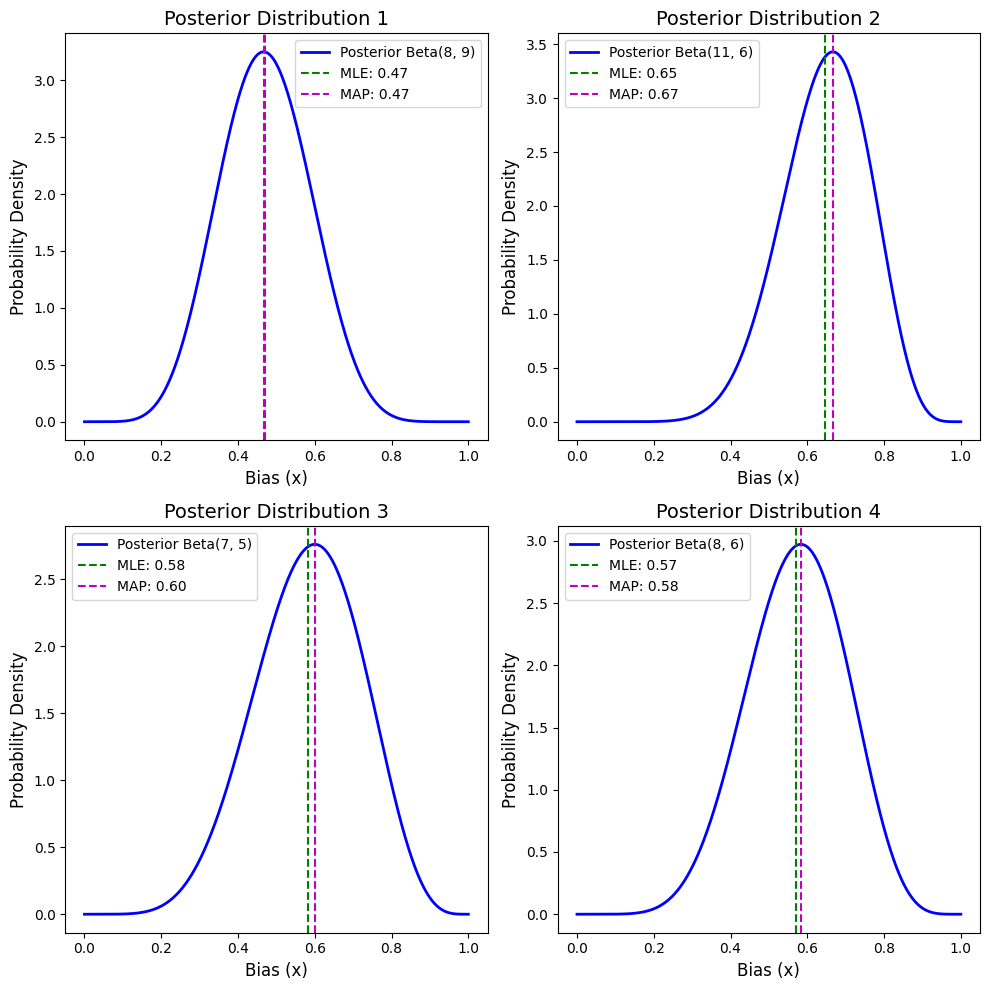

In [73]:
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Flatten the axs array if it's more than 1 row
if num_rows > 1:
    axs = axs.flatten()

# Plot posterior distributions on each subplot
for i, (a, b) in enumerate(priors):
    posterior_a = a
    posterior_b = b
    for outcome in outcomes:
        if outcome == 'H':
            posterior_a += 1
        else:
            posterior_b += 1
    ax = axs[i]
    ax.plot(x, beta_distribution(x, posterior_a, posterior_b), 'b-', lw=2, label='Posterior Beta({}, {})'.format(posterior_a, posterior_b))

    # Calculate MLE and MAP estimates
    mle_estimate = posterior_a / (posterior_a + posterior_b)
    map_estimate = (posterior_a - 1) / (posterior_a + posterior_b - 2)
    ax.axvline(x=mle_estimate, color='g', linestyle='--', label='MLE: {:.2f}'.format(mle_estimate))
    ax.axvline(x=map_estimate, color='m', linestyle='--', label='MAP: {:.2f}'.format(map_estimate))

    ax.set_title('Posterior Distribution {}'.format(i+1), fontsize=14)
    ax.set_xlabel('Bias (x)', fontsize=12)
    ax.set_ylabel('Probability Density', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.legend(prop={'size': 10})


# Turn off empty subplots
for i in range(num_priors, num_rows * num_cols):
    axs.flatten()[i].axis('off')


plt.tight_layout()
plt.show()